<a href="https://colab.research.google.com/github/mdaugherity/Numerical2024/blob/main/fits/Week_5_Curve_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dr. Daugherity, PHYS 351, Fall 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Curve Fit
For polynomial fits using ```np.polyfit``` is very fast and easy.  For arbitrary functions the problem becomes much, much harder.  Instead of being able to calculate the answer directly, we will have to search for a solution.  Let's look at how ```scipy.optimize.curve_fit``` does it:
* Start with an initial guess for the fit parameters (default is all ones)
* Evaluate the fit function for those parameters and calculate a total fit error $\chi^2$ as the *sum* of the residuals *squared* for all data points
* Adjust the parameters in the direction that makes the error smaller
* Repeat until a local minimum is found

The default method uses a clever combination of gradient descent and Newton's method to find the nearest minimum.  

**References:**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html



# Simple Examples

## Example 1 - Linear Fit

Going with **Dr. D's Golden Rule of Computing**, let's start with a simple problem.

In [14]:
def linearfun(x,m,b):  # define fit function: first par is x, other pars get automatically adjusted
  return m*x+b

In [15]:
# Make linear data
xdata = np.arange(0,5)
m = 2
b = 1
ydata = linearfun(xdata,m,b)
print('Truth:',[m,b])

Truth: [2, 1]
Fit Pars: [2. 1.]


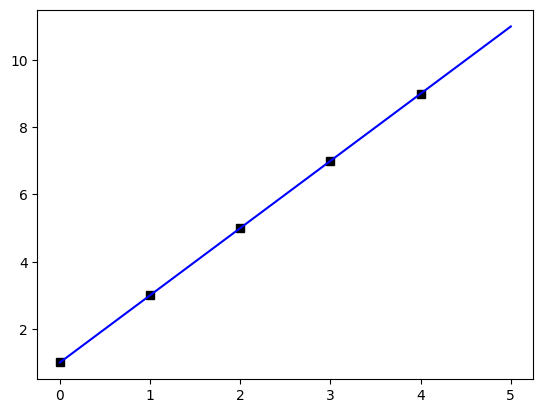

In [16]:
popt, pcov = curve_fit(linearfun,xdata,ydata)  # find best pars
print('Fit Pars:', popt)

xfit = np.linspace(0,5) # evaluate fit function
yfit = linearfun(xfit, *popt) # *popt unpacks array into function args

plt.plot(xdata,ydata,'ks')
plt.plot(xfit,yfit,'b-')
plt.show()

## Example 2 - Exponential

Truth:  10 -0.25
Fit Pars: [10.   -0.25]


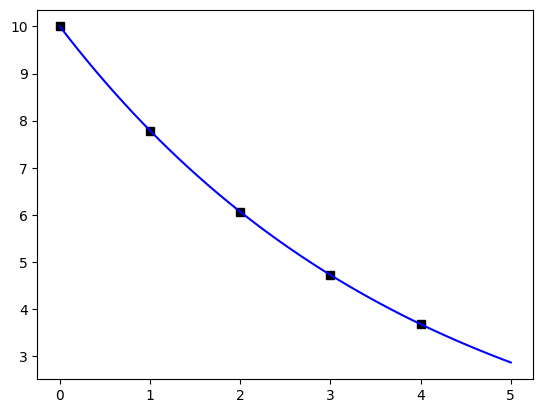

In [19]:
def expfun(x,a,b):  # define fit function: first par is x, other pars get automatically adjusted
  return a*np.exp(b*x)

xdata = np.arange(0,5)
a = 10
b = -0.25
ydata = expfun(xdata,a,b)
print('Truth: ',a,b )

popt, pcov = curve_fit(expfun,xdata,ydata)  # find best pars
print('Fit Pars:', popt)

xfit = np.linspace(0,5) # evaluate fit function
yfit = expfun(xfit, *popt) # *popt unpacks array into function args

plt.plot(xdata,ydata,'ks')
plt.plot(xfit,yfit,'b-')
plt.show()

# Warning: It Isn't Always Simple
One of the more frustrating things when working with curve_fit is that unless you plot the result you have absolutely no way of knowing if the result is good or garbage.  (Note that the proper way is to define error bars on every point and check if $\chi^2/\nu \approx 1$, but that is a later discussion.)

The moral of the story: **LOCAL MIN** $\ne$ **GLOBAL MIN**

You can either a) use a better fitter or b) adjust the initial guess.

Actual  8 1.4142135623730951
Fit Pars: [-1.74977199  0.998064  ]


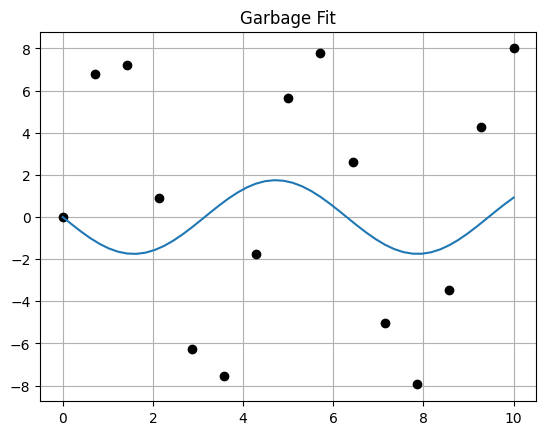

In [22]:
def sinfun(x,a,b):  # define fit function: first par is x, other pars get automatically adjusted
  return a*np.sin(b*x)

xdata = np.linspace(0,10,15)
a = 8
b = 2**0.5
print('Actual ', a,b)
ydata = sinfun(xdata,a,b)

popt, pcov = curve_fit(sinfun,xdata,ydata)  # find best pars
print('Fit Pars:', popt)

xfit = np.linspace(0,10) # evaluate fit function
yfit = sinfun(xfit, *popt) # *popt unpacks array into function args

plt.plot(xdata,ydata,'ko')
plt.plot(xfit,yfit)
plt.title('Garbage Fit')
plt.grid()
plt.show()

To find a better initial guess you can:
* play around plotting different parameter values
* analyze the graph and get amplitudes, wavelengths, peaks, etc.
* try random values and get lucky

Here we see the amplitude is around 8 and the wavelength is around 5, so $k\approx 2\pi/5 \approx 1.2 $.  Plug this in for an initial guess

Fit Pars: [8.         1.41421356]


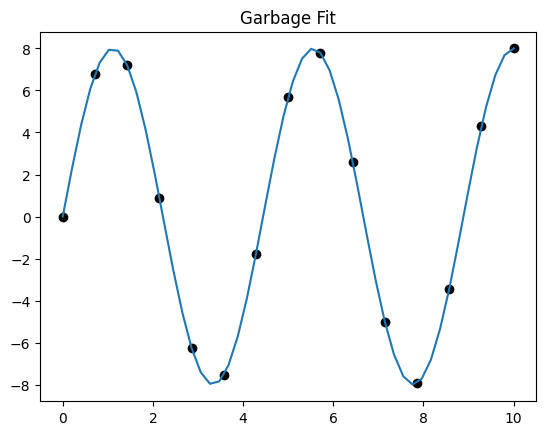

In [28]:
p0 = [8,1.2]
popt, pcov = curve_fit(sinfun,xdata,ydata, p0)  # find best pars
print('Fit Pars:', popt)

xfit = np.linspace(0,10) # evaluate fit function
yfit = sinfun(xfit, *popt) # *popt unpacks array into function args

plt.plot(xdata,ydata,'ko')
plt.plot(xfit,yfit)
plt.title('Good Fit')
plt.show()

We'll see some advanced fitting tricks next...